Инициализация библиотек


In [49]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

Загрузка данных в датафрейм pandas.

In [50]:
# Read data
data_flat = pd.read_excel('data/flats.xlsx')
data_euro_ren = pd.read_excel('data/euro_renovation.xlsx')

# Concat two dataframes into one.
data = pd.concat([data_flat, data_euro_ren], ignore_index= True )

In [51]:
# Display top of dataframe.
data.head()

,id,offer_views,city,lat,lon,price_sq,area,floor,kitchen_area,bathroom_type,balconies,renovation,is_apartment,rooms,has_gas,house_floors,house_wall_type,lifts,freight_lifts,time_on_foot_to_subway,build_year,urgent,duplicates_count,sale_type,is_auction,all_data.house.ceiling_height,all_data.house.has_garbage_disposer,all_data.is_auction,all_data.object_info.living_area,all_data.object_info.window_view[0].display_name,...,all_data.object_info.window_view[2].display_name,all_data.object_info.window_view[3].display_name,all_data.object_info.window_view[4].display_name,all_data.object_info.loggias,all_data.legal_options.approve,all_data.legal_options.mortgage,all_data.legal_options.is_individual,all_data.legal_options.is_owner,all_data.legal_options.owner_minors,all_data.legal_options.residence_minors,all_data.object_info.redevelopment,all_data.house.security[0].display_name,all_data.house.security[1].display_name,all_data.house.security[2].display_name,all_data.house.security[3].display_name,all_data.house.parking[0].display_name,all_data.house.parking[1].display_name,all_data.house.parking[2].display_name,all_data.house.parking[3].display_name,all_data.house.parking[4].display_name,all_data.house.yard[0].display_name,all_data.house.yard[1].display_name,all_data.house.infrastructure[0].display_name,all_data.house.infrastructure[1].display_name,all_data.house.infrastructure[2].display_name,all_data.house.infrastructure[3].display_name,all_data.house.infrastructure[4].display_name,all_data.legal_options.years_ownership.display_name,all_data.legal_options.owner_count,all_data.object_info.garage_type.display_name
0,1914739808,0,Казань,55.752364,49.171021,176510.0,49.0,18.0,12.5,None,0,NaN,None,1.0,None,23,Монолитный,1,0,24.0,2022.0,False,0,Свободная продажа,False,2.8,False,False,20.4,Улица,...,NaN,NaN,NaN,1.0,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1915485255,0,Москва,55.734623,37.613548,179404.0,38.6,5.0,0.0,None,0,NaN,None,1.0,True,6,Кирпичный,0,0,5.0,1900.0,False,0,NaN,True,NaN,NaN,True,NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1914105595,0,Новосибирск,55.059296,82.974436,91863.0,38.1,1.0,12.1,Совмещенный,0,Косметический,False,1.0,False,5,Кирпичный,0,0,NaN,1950.0,False,0,Свободная продажа,False,NaN,False,False,14.5,Двор,...,NaN,NaN,NaN,NaN,True,NaN,False,False,False,False,False,Домофон,NaN,NaN,NaN,Во дворе,NaN,NaN,NaN,NaN,Детская площадка,Спортивная площадка,Школа,Детский сад,Торговый центр,Парк,Фитнес,NaN,NaN,NaN
3,1914234894,0,Новосибирск,55.063730,82.934848,112903.0,31.0,4.0,6.0,Совмещенный,0,Косметический,False,1.0,False,5,Кирпичный,0,0,25.0,1964.0,False,0,Свободная продажа,False,2.8,False,False,18.0,Двор,...,NaN,NaN,NaN,NaN,True,NaN,False,False,False,False,False,Домофон,NaN,NaN,NaN,Во дворе,NaN,NaN,NaN,NaN,Детская площадка,Спортивная площадка,Школа,Парк,Детский сад,Фитнес,Торговый центр,Больше пяти,1.0,NaN
4,1913219306,0,Казань,55.753630,49.246030,167682.0,65.6,2.0,13.8,None,1,NaN,False,2.0,True,10,Кирпичный,1,0,NaN,2013.0,False,0,NaN,False,NaN,NaN,False,NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Детская площадка,Спортивная площадка,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Replace all occurrences of empty values and None with numpy not a number.
data = data.replace({'': np.nan, 'None': np.nan})

Конвертируем столбцы с числовыми данными в int/float.
Заменяем nan данные столбцов.

In [53]:
for col in list(data.columns):
    # Select columns that should be numeric
    if ('area' in col or 'height' in col or 'owner_count' in col or 'lat' in col or 'lon' in col):
        # Convert the data type to float
        data[col] = data[col].replace(regex={',': '.'}).astype(float)
    elif 'rooms' == col:
        # If no data about amount of rooms set to 1.
        data[col] = data[col].replace(regex={np.nan: 1}).astype(int)
    elif 'build_year' == col:
        # If no data about year of building set to mean year.
        data[col] = data[col].fillna(np.round(data[col].mean()))
        data[col] = data[col].astype(int)
    elif 'all_data.house.has_garbage_disposer' == col:
        # If no data about garbage disposer set to False.
        data[col] = data[col].replace(regex={np.nan: False})
    elif 'has_gas' == col:
        # If no data about gas set to False.
        data[col] = data[col].replace(regex={np.nan: False})
    elif 'renovation' == col:
        # If no data about gas set to False.
        data[col] = data[col].replace(regex={np.nan: 'Без ремонта'})


Анализируем датафрейм.
Следующая функция считает количество пропущенных значений и процент пропущенных значений от общего числа значений в столбце.

In [54]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * mis_val / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(data)

Your selected dataframe has 61 columns.
There are 41 columns that have missing values.


,Missing Values,% of Total Values
all_data.house.parking[4].display_name,8008,100.0
all_data.object_info.window_view[4].display_name,8008,100.0
all_data.object_info.window_view[3].display_name,7996,99.8
all_data.house.parking[3].display_name,7995,99.8
all_data.house.security[3].display_name,7958,99.3
all_data.object_info.window_view[2].display_name,7932,99.0
all_data.house.parking[2].display_name,7915,98.8
all_data.house.security[2].display_name,7791,97.3
all_data.house.parking[1].display_name,7710,96.2
all_data.object_info.garage_type.display_name,7662,95.6


Удаляем столбцы с количеством пропущенных значений больше 50%.

In [55]:
# Get the columns with > 50% missing
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))
# Drop the columns
data = data.drop(columns = list(missing_columns))

Your selected dataframe has 61 columns.
There are 41 columns that have missing values.
We will remove 33 columns.


In [56]:
# Change build_year to 2023 of apartment with build_year=23
data['build_year'] = data['build_year'].replace(regex={23: 2023})

Анализируем столбец тип ремонта.
С помощью регулярных выражений обьединяем одинаковые типы ремонта с самыми большими количествами строк.

In [57]:
print(data.pivot_table(index = ['renovation'], aggfunc ='size').sort_values(ascending=False))

renovation
Без ремонта                        3480
Косметический                      1186
Евро                               1104
косметический                       613
Требует ремонта                     474
Дизайнерский                        461
евроремонт                          211
Отсутствует                         125
Требуется                           121
Хороший                              72
Под чистовой ремонт                  44
С отделкой                           39
Частичный ремонт                     20
чистовая отделка                     15
Косметический ремонт                  6
Предчистовая                          5
нормальное                            4
cosmetic                              3
Евроремонт                            3
хорошее                               2
предчистовая                          2
отличное                              2
Чистовая                              2
Под ключ                              2
design                       

In [58]:
data['renovation'] = data['renovation'].replace(regex={'[Кк]осметический.*': 'Косметический', 'Отсутствует': 'Без ремонта', '[Тт]реб.*': 'Требует ремонта', '[ Ее]вро.*': 'Евроремонт'})

In [59]:
print(data.pivot_table(index = ['renovation'], aggfunc ='size').sort_values(ascending=False))

renovation
Без ремонта                        3605
Косметический                      1805
Евроремонт                         1319
Требует ремонта                     597
Дизайнерский                        461
Хороший                              72
Под чистовой ремонт                  44
С отделкой                           39
Частичный ремонт                     20
чистовая отделка                     15
Предчистовая                          5
нормальное                            4
cosmetic                              3
хорошее                               2
предчистовая                          2
отличное                              2
Чистовая                              2
Под ключ                              2
design                                2
Произведен                            2
no                                    1
euro                                  1
Хорошее                               1
Чистовая отделка                      1
под самоотделку              

In [60]:
# New column with total price (price of squere multiply area of apartment)
data['price'] = data.apply(lambda row: row.price_sq * row.area, axis=1)

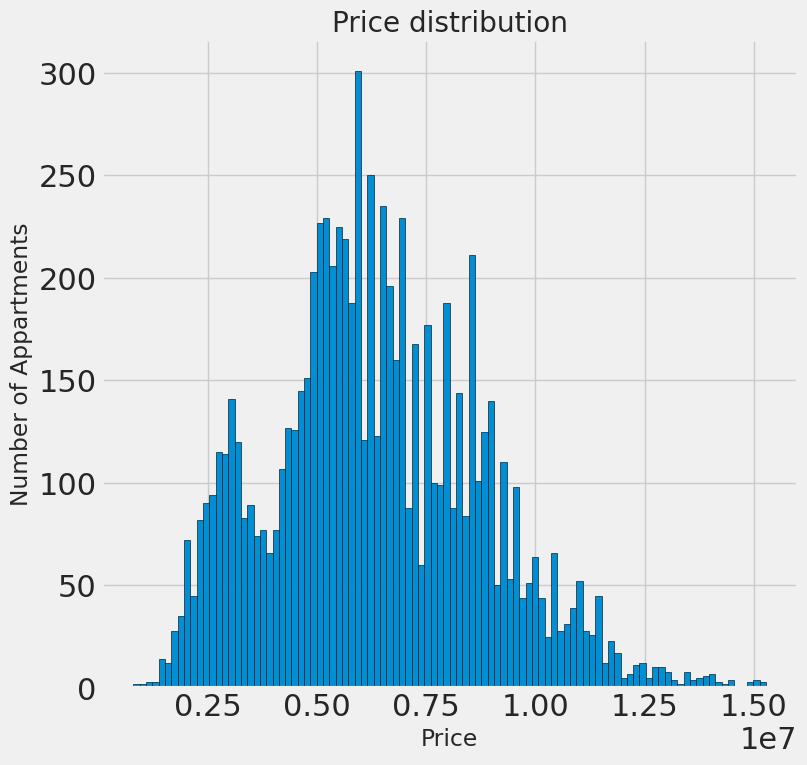

In [61]:
figsize(8, 8)

# Histogramma price of appartment by amount

plt.style.use('fivethirtyeight')
plt.hist(data['price'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Price'); plt.ylabel('Number of Appartments');
plt.title('Price distribution');

Гистограмма показывает, что цена большинства квартир от 5 до 8 млн рублей.

Чтобы посмотреть на эффект категорийных переменных, создадим графики распределения, используя самые популярные значения в столбцах.

В первом графике покажем распределение цены квартиры в зависимости от типа ремонта.

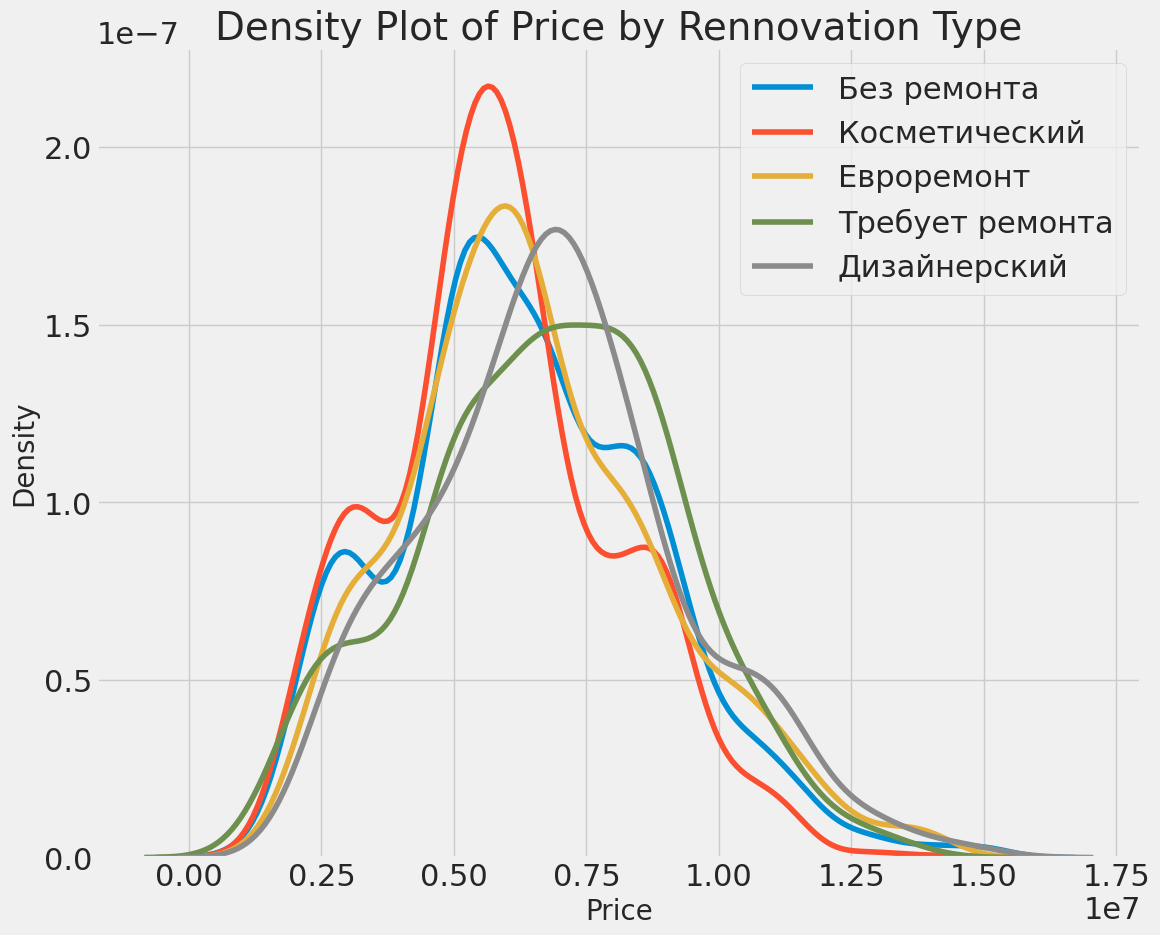

In [62]:
# Create a list of renovation types with more than 100 apartments
ren = data.dropna(subset=['price'])
ren = ren['renovation'].value_counts()
ren = list(ren[ren.values > 100].index)

# Plot of distribution of scores for building categories
figsize(12, 10)


# Plot each building
for ren_type in ren:
    # Create subset with all renovation type = b_type
    subset = data[data['renovation'] == ren_type]

    # Density plot of Price
    sns.kdeplot(subset['price'].dropna(), label = ren_type);

# label the plot
plt.legend()
plt.xlabel('Price', size = 20); plt.ylabel('Density', size = 20);
plt.title('Density Plot of Price by Rennovation Type', size = 28);

Из графика видно, что тип ремонта не сильно влияет на итоговую цену квартиры

Для анализа другой переменной, города, можем использовать тот же график, но теперь с кривыми городов.

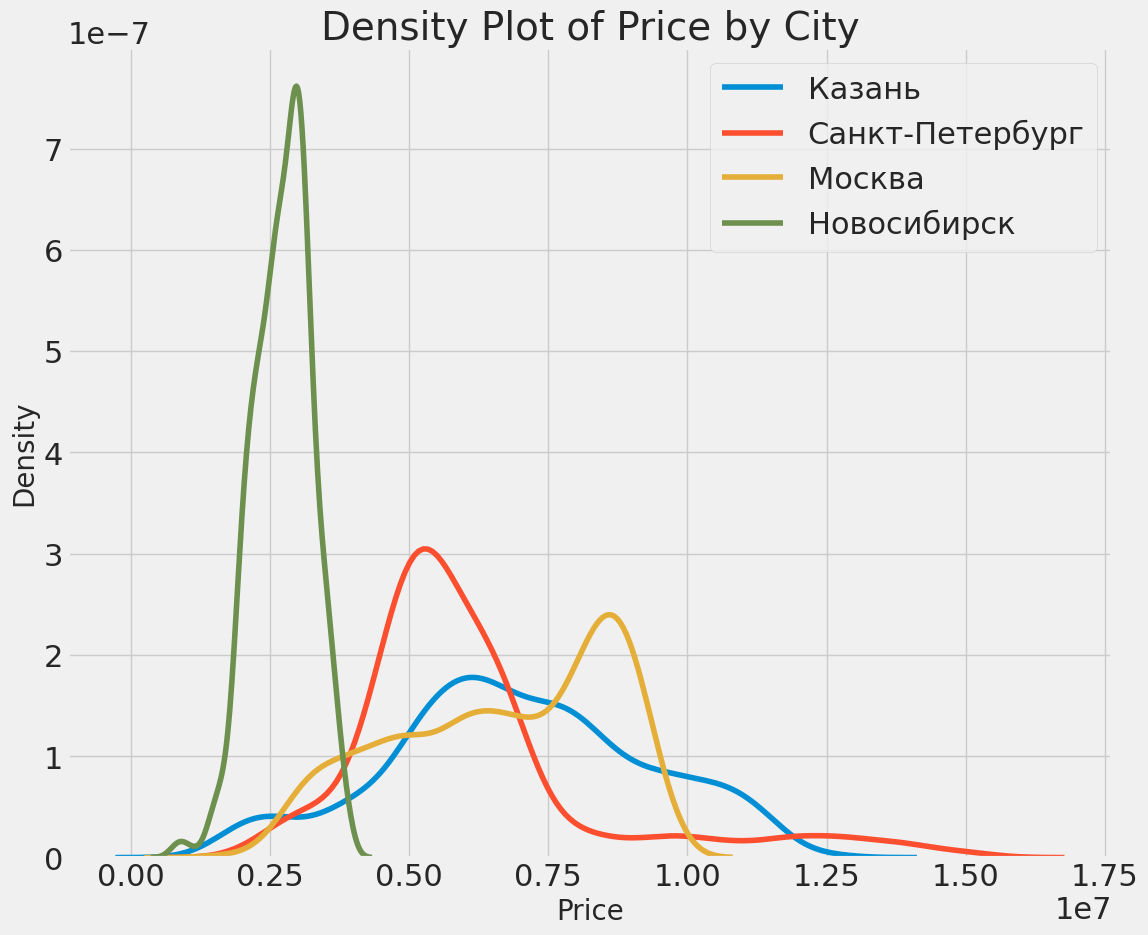

In [63]:
# Create a list of cities with more than 100 apartments
cities = data.dropna(subset=['price'])
cities = cities['city'].value_counts()
cities = list(cities[cities.values > 100].index)

# Plot of distribution of scores for cities categories
figsize(12, 10)


# Plot each city
for city in cities:
    # Create subset with all city column = city
    subset = data[data['city'] == city]

    # Density plot of Price
    sns.kdeplot(subset['price'].dropna(),  label = city);

# label the plot
plt.legend()
plt.xlabel('Price', size = 20); plt.ylabel('Density', size = 20);
plt.title('Density Plot of Price by City', size = 28);

Из графика видно, что город влияет на цену квартиры. Самые дешевые квартиры в Новосибирске.

Для того, чтобы определить кореляция между переменными и целью, можем рассчитать коэффициент корреляции Пирсона. Это мера зависимости меду двумя переменными: +1 означает наличие полной положительной линейной связи, а значение -1 – наличие полной отрицательной линейной связи.

In [64]:
# Find all correlations and sort
correlations_data = data.corr()['price'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

lon                                   -0.284432
offer_views                           -0.098994
all_data.legal_options.approve        -0.084736
id                                    -0.068462
time_on_foot_to_subway                -0.021479
urgent                                -0.005181
all_data.house.has_garbage_disposer   -0.003083
lat                                    0.005140
all_data.is_auction                    0.021262
is_auction                             0.021262
duplicates_count                       0.029475
freight_lifts                          0.045371
lifts                                  0.116062
balconies                              0.139714
floor                                  0.182064
Name: price, dtype: float64 

all_data.is_auction                 0.021262
is_auction                          0.021262
duplicates_count                    0.029475
freight_lifts                       0.045371
lifts                               0.116062
balconies                

<ipython-input-64-4fdb37502ce6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_data = data.corr()['price'].sort_values()


Здесь видны несколько сильных положительных корреляций между переменными и целью.

Для того, чтобы учесть нелинейные зависимости, можем взять корни и натуральные логарифмы от переменных и посчтитать корреляцию.

В коде ниже, берём логорифм и корень числовых переменных. Применим one-hot кодирование к категориальным столбцам: разбиваем столбцы на 2 столбца, с значениями 1 и 0. Расчитываем корреляцию переменных и цены.

In [65]:
# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'price':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data[['city', 'renovation','house_wall_type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['price'])

# Find correlations with the score
correlations = features.corr()['price'].dropna().sort_values()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = geta

In [66]:
# Display most negative correlations
correlations.head(15)

city_Новосибирск             -0.436256
lon                          -0.284432
sqrt_lon                     -0.249198
log_offer_views              -0.215038
log_lon                      -0.212453
house_wall_type_Кирпичный    -0.127301
renovation_Косметический     -0.101845
offer_views                  -0.098994
sqrt_offer_views             -0.098910
id                           -0.068462
house_wall_type_Панельный    -0.062103
sqrt_id                      -0.061055
house_wall_type_Деревянный   -0.058468
house_wall_type_Смешанные    -0.046824
city_Санкт-Петербург         -0.044529
Name: price, dtype: float64

In [67]:
# Display most positive correlations
correlations.tail(15)

sqrt_price_sq                            0.312238
log_house_floors                         0.327211
log_price_sq                             0.335437
log_all_data.object_info.living_area     0.363930
all_data.object_info.living_area         0.368993
sqrt_all_data.object_info.living_area    0.371313
sqrt_rooms                               0.418838
rooms                                    0.426470
sqrt_kitchen_area                        0.445413
kitchen_area                             0.523072
log_kitchen_area                         0.542677
log_area                                 0.585596
area                                     0.586133
sqrt_area                                0.593110
price                                    1.000000
Name: price, dtype: float64

После изменения переменных сильные положительные значения остались почти без изменения. Но появилась сильная негативная корреляция город Новосибирск.
Взятия корня и натурального логарифма от переменных повлияли на результат незначительно.

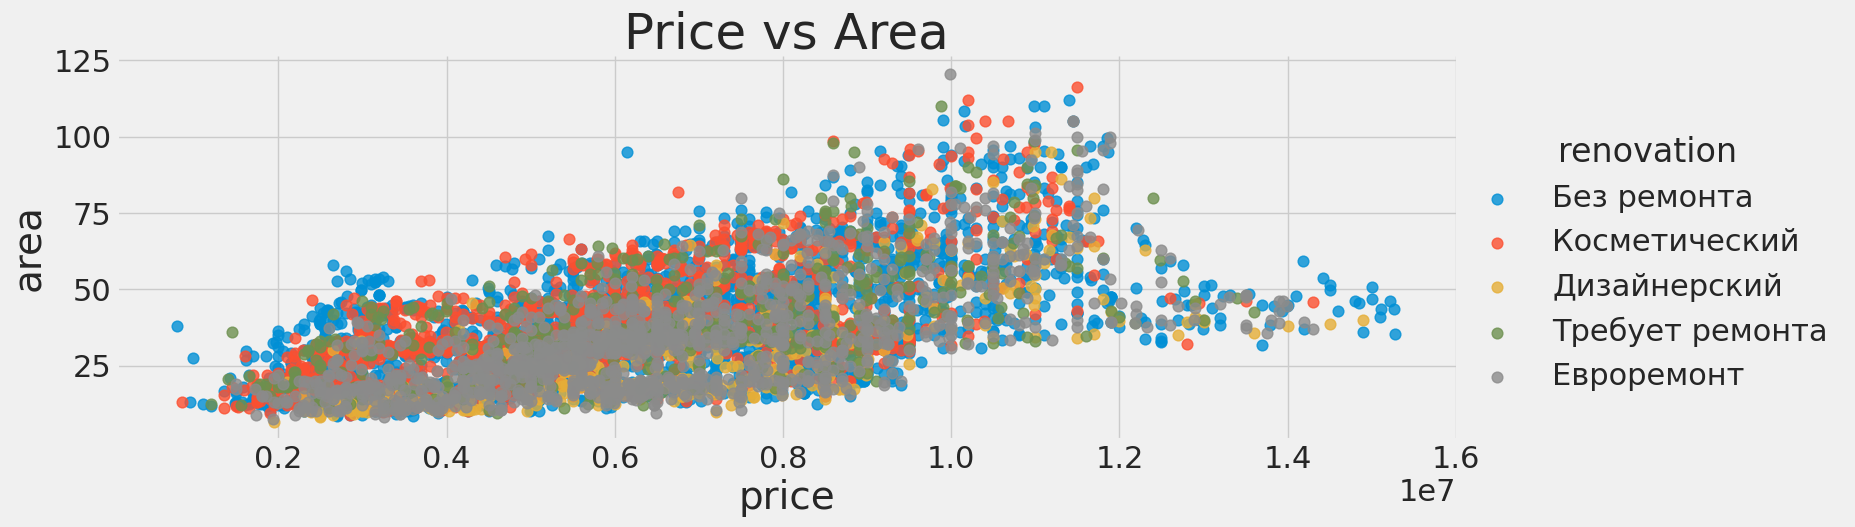

In [68]:
figsize(30, 30)

# Extract the renovation types
features['renovation'] = data.dropna(subset = ['price'])['renovation']

# Limit to renovation types with more than 100 apartments (from previous code)
features = features[features['renovation'].isin(ren)]

# Use seaborn to plot a scatterplot of Price vs Area
sns.lmplot(x='price', y='area', hue = 'renovation', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          aspect = 3,);

# Plot labeling
plt.xlabel("price", size = 28)
plt.ylabel('area', size = 28)
plt.title('Price vs Area', size = 36);

Здесь видна положительная зависимость между площадью и ценой. Коэффициент корреляции 0,58

Для последнего анализа данных, можеи создать парный грфаик между несколькими переменными

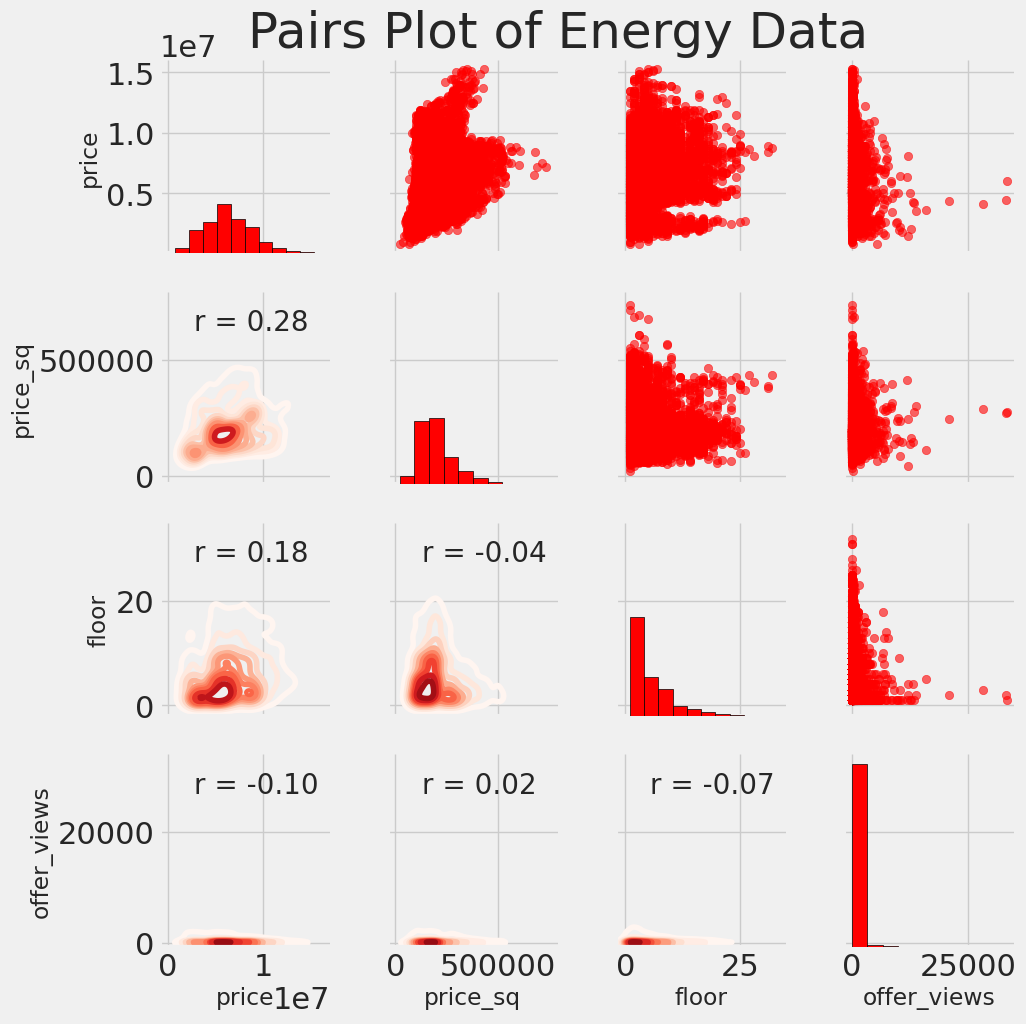

In [69]:
# Extract the columns to  plot
plot_data = features[['price', 'price_sq',
                      'floor', 'offer_views']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})


# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

Для того, чтобы понять зависимость, можем посмотреть где строка переменной пересекается с столбцом.
Для примера 3 строка 1 столбец. Зависимость между этажом квартиры и ценой. Видно что корреляция +0.18. Если посмотреть на 1 строку 3 столбец можно увидеть график рассеивания.

В коде ниже, применим к категориальным переменным (городе, тип стены дома, тип ремонта, наличие газа и т.д) one-hot кодирование.
Добавим взятие натурального логарифма от всех числовых переменных.

In [70]:
# Copy the original data
features = data.copy()

# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'price':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data[['city', 'house_wall_type', 'renovation', 'is_apartment', 'has_gas', 'sale_type',]]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = geta

(8011, 90)

Теперь мы имеем больше 8000 наблюдений (квартир) с 90 колонками  (признаками). Не все столбцы полезны для прогнозирования цены. Займёмся выбором лишних признаков.

Коллинеарные признаки, признаки сильно коррелирующие между собой, не помогают модели выполнить свою цель. А удаление одной из них скорее поможет модели.

Код ниже находит коллинеарные переменные методом фактора увеличения дисперси. И отбрасывает один из признаков если коэффицент корреляции между ними больше 0.6.

In [71]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.

    Inputs:
        threshold: any features with correlations greater than this value are removed

    Output:
        dataframe that contains only the non-highly-collinear features
    '''

    # Dont want to remove correlations between Price
    y = x['price']
    x = x.drop(columns = ['price'])

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)

    # Add the score back in to the data
    x['price'] = y

    return x


features = remove_collinear_features(features, 0.6);

In [72]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(8011, 65)

После отбора осталось 65 признаков, один из которых цена.

Убирём квартиру без извествной цены если есть такая.

In [73]:
# Extract the buildings with no score and the buildings with a score
no_price = features[features['price'].isna()]
price = features[features['price'].notnull()]

print(no_price.shape)
print(price.shape)

(1, 65)
(8010, 65)


Разобъём данные на обучающий и тестовый наборы:


In [74]:
# Separate out the features and targets
features = price.drop(columns='price')
targets = pd.DataFrame(price['price'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
train_features, test_featuers, train_labels, test_labels = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(train_features.shape)
print(test_featuers.shape)
print(train_labels.shape)
print(test_labels.shape)

(5607, 64)
(2403, 64)
(5607, 1)
(2403, 1)


Теперь мы имеем обучающий набор с 5607 квартир и тествоый набор с 2403 квартирами.

Сохранним данные в папку data

In [75]:
no_price.to_csv('data/no_price.csv')
train_features.to_csv('data/train_features.csv')
test_featuers.to_csv('test_featuers.csv')
train_labels.to_csv('data/train_labels.csv')
test_labels.to_csv('data/test_labels.csv')